In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
file = "./Wage2.csv"
data = pd.read_csv(file)
data.head()

,wage,iq,educ
0,700,99,12
1,1299,125,18
2,1000,72,12
3,800,105,14
4,963,85,14


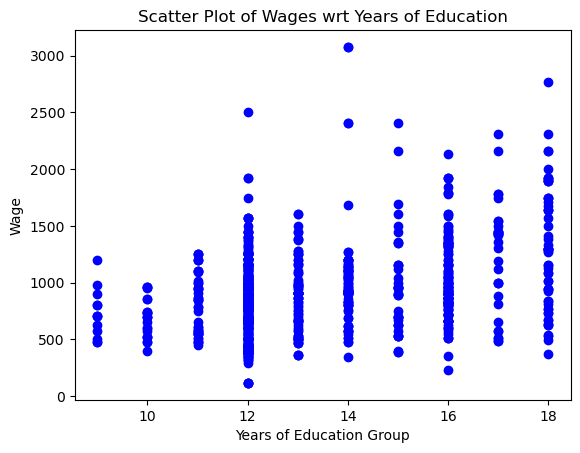

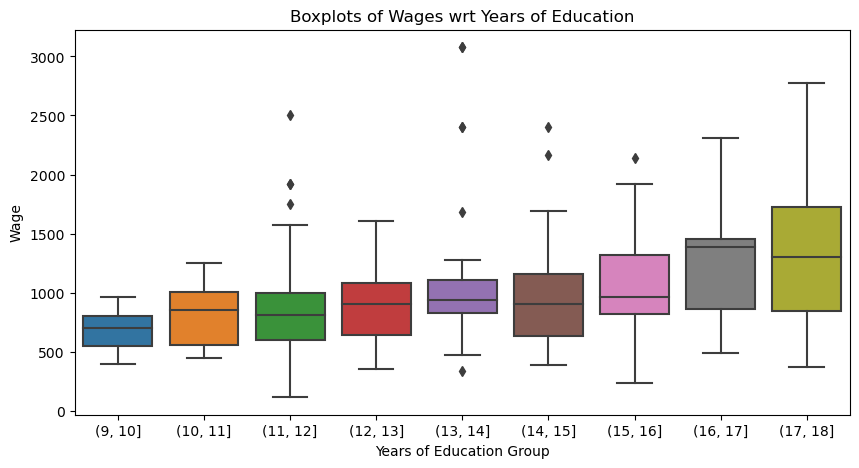

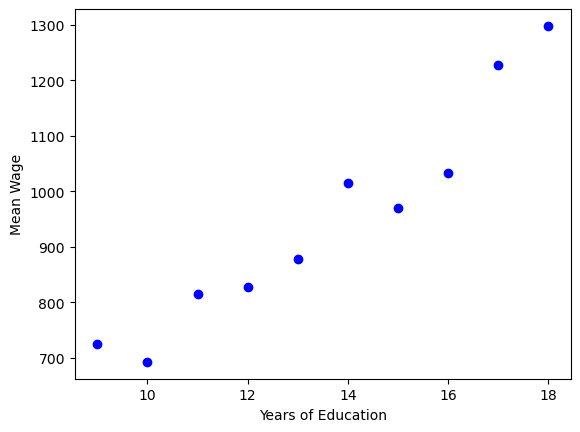

In [3]:
y = data[["wage"]]
x1 = data[["educ"]]
plt.scatter(x1, y, c ="blue")
plt.title("Scatter Plot of Wages wrt Years of Education")
plt.xlabel('Years of Education Group')
plt.ylabel('Wage')
plt.show()

# Group wages by years of education
data.sort_values(by=['educ'])
educ_bins = data.educ.unique()
educ_bins.sort()
data['educ_group'] = pd.cut(data['educ'], bins=educ_bins)
plt.figure(figsize=(10, 5))
sns.boxplot(x='educ_group', y='wage', data=data)
plt.title('Boxplots of Wages wrt Years of Education')
plt.xlabel('Years of Education Group')
plt.ylabel('Wage')
plt.show()

d = data.groupby("educ")["wage"].mean()
df1 = pd.DataFrame(d)
df1 = df1.reset_index()
df1.rename(columns = {'wage':'wage mean'}, inplace = True) 
plt.scatter(x=df1[['educ']], y=df1[['wage mean']], c="blue")
plt.xlabel('Years of Education')
plt.ylabel('Mean Wage')
plt.show()

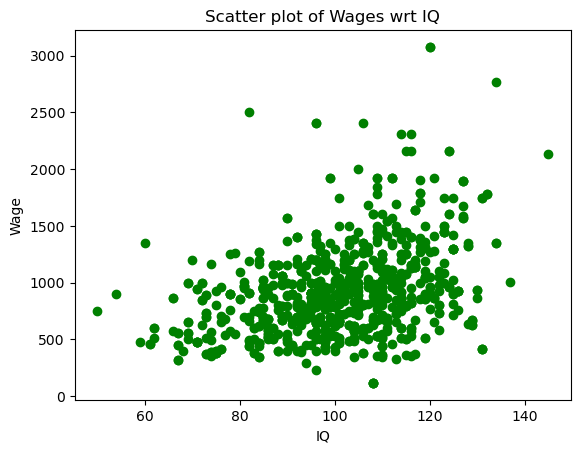

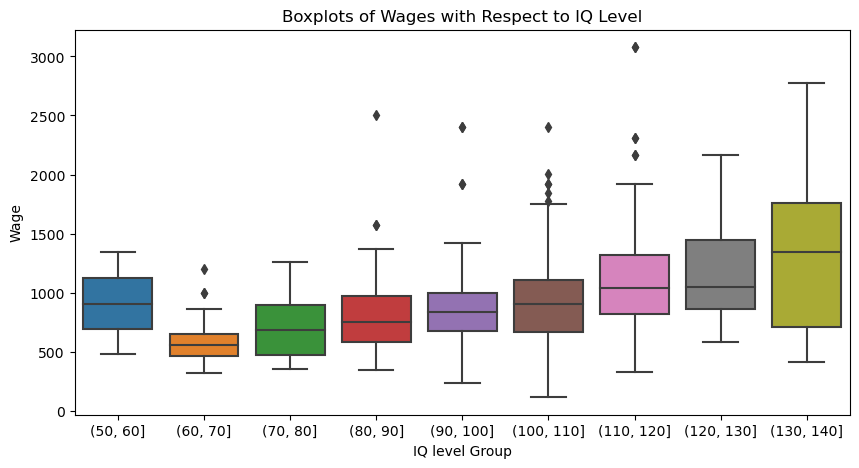

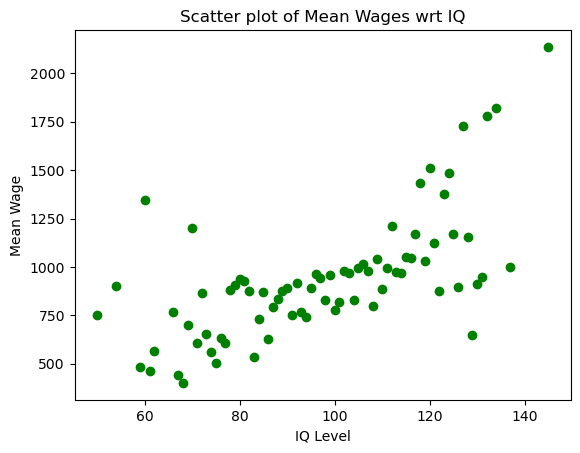

In [4]:
y = data[["wage"]]
x2 = data[["iq"]]
plt.scatter(x2, y, c ="green")
plt.title('Scatter plot of Wages wrt IQ')
plt.xlabel('IQ')
plt.ylabel('Wage')
plt.show()

# Group wages by IQ
data.sort_values(by=['iq'])
iq_bins = [50,60,70,80,90,100,110,120,130,140]
iq_bins.sort()
data['iq_group'] = pd.cut(data['iq'], bins=iq_bins)
plt.figure(figsize=(10, 5))
sns.boxplot(x='iq_group', y='wage', data=data)
plt.title('Boxplots of Wages with Respect to IQ Level')
plt.xlabel('IQ level Group')
plt.ylabel('Wage')
plt.show()

d = data.groupby("iq")["wage"].mean()
df2 = pd.DataFrame(d)
df2 = df2.reset_index()
df2.rename(columns = {'wage':'wage mean'}, inplace = True) 
plt.scatter(x=df2[['iq']], y=df2[['wage mean']], c="green")
plt.title('Scatter plot of Mean Wages wrt IQ')
plt.xlabel('IQ Level')
plt.ylabel('Mean Wage')
plt.show()

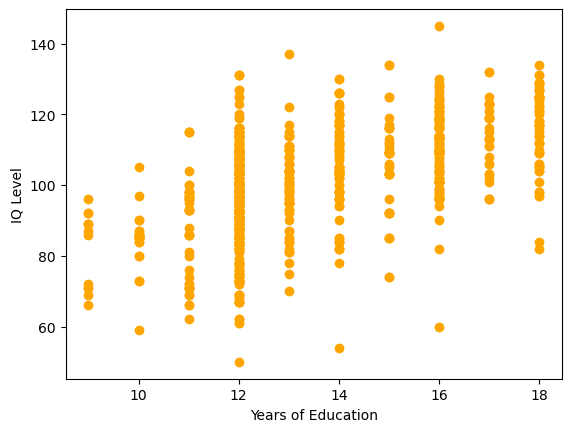

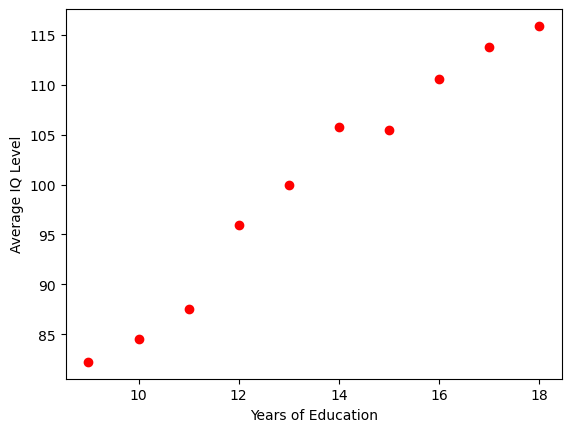

In [5]:
y = data[["iq"]]
x2 = data[["educ"]]
plt.scatter(x2, y, c ="orange")
plt.xlabel('Years of Education')
plt.ylabel('IQ Level')
plt.show()

d = data.groupby("educ")["iq"].mean()
df = pd.DataFrame(d)
df = df.reset_index() 
plt.scatter(x=df[['educ']], y=df[['iq']], c="red")
plt.xlabel('Years of Education')
plt.ylabel('Average IQ Level')
plt.show()

In [6]:
print(" The average wage is : Rs.", round(mean(data['wage']),2))
print(" The minimum wage is : Rs.", round(min(data['wage']),2))
print(" The maximum wage is : Rs.", round(max(data['wage']),2))

 The average wage is : Rs. 928.7
 The minimum wage is : Rs. 115
 The maximum wage is : Rs. 3078


In [7]:
print(" The average IQ is :", round(mean(data['iq']),2))
print(" The minimum IQ is :", round(min(data['iq']),2))
print(" The maximum IQ is :", round(max(data['iq']),2))

 The average IQ is : 101.0
 The minimum IQ is : 50
 The maximum IQ is : 145


In [8]:
#To find the correlation linearity, direction and strength
correlation_matrix = data.corr()
correlation_coefficient = correlation_matrix.loc['wage', 'iq']
print(f'Correlation Coefficient between wage and iq: {correlation_coefficient}')

correlation_coefficient, p_value = pearsonr(data['iq'], data['wage'])
print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Correlation Coefficient between wage and iq: 0.37254786904569465
Pearson Correlation Coefficient: 0.3725478690456939
P-value: 1.6028269351310816e-30


In [9]:
X = sm.add_constant(data['iq'])
y = data['wage']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     142.3
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           1.60e-30
Time:                        22:58:51   Log-Likelihood:                -6469.8
No. Observations:                 885   AIC:                         1.294e+04
Df Residuals:                     883   BIC:                         1.295e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.6541     82.499     -0.541      0.5

In [10]:
coeff = 9.6367
std_error = 0.808

t_statistic = coeff/std_error
# Compare with critical t-value
alpha = 0.05
degrees_of_freedom = len(data) - 1
critical_t_value = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

# Make a decision
if abs(t_statistic) > critical_t_value:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [11]:
print(" The average years of education is :", round(mean(data['educ']),2),"yrs")
print(" The minimum years of education is :", round(min(data['educ']),2),"yrs")
print(" The maximum years of education is :", round(max(data['educ']),2),"yrs")

 The average years of education is : 13.47 yrs
 The minimum years of education is : 9 yrs
 The maximum years of education is : 18 yrs


In [12]:
X = sm.add_constant(data[['iq','educ']])
y = data['wage']

# Fit the OLS model
model_B = sm.OLS(y, X).fit()

# Print the summary
print(model_B.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     94.31
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           7.61e-38
Time:                        22:58:52   Log-Likelihood:                -6450.1
No. Observations:                 885   AIC:                         1.291e+04
Df Residuals:                     882   BIC:                         1.292e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -270.2086     88.254     -3.062      0.0

In [13]:
# Get the predicted values
y_pred = 6.3798*data['iq']+41.1528*data['educ']-270.2086

In [14]:
#Regressing IQ on Years of Education
X = sm.add_constant(data[['educ']])
y = data['iq']

# Fit the OLS model
model_C = sm.OLS(y, X).fit()

# Print the summary
print(model_C.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     374.4
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           8.28e-70
Time:                        22:58:52   Log-Likelihood:                -3500.6
No. Observations:                 885   AIC:                             7005.
Df Residuals:                     883   BIC:                             7015.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.3107      2.654     18.955      0.0

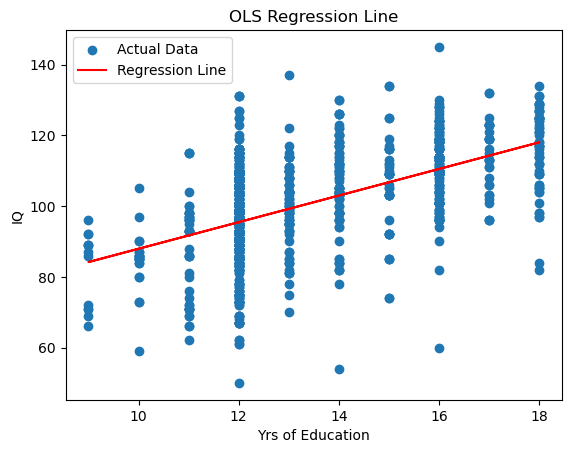

In [15]:
y_Pred = model_C.predict(X)

# Scatter plot of actual data points
plt.scatter(data['educ'], y, label='Actual Data')

# Plot the regression line
plt.plot(data['educ'], y_Pred, label='Regression Line', color='red')

# Add labels and legend
plt.xlabel('Yrs of Education')
plt.ylabel('IQ')
plt.legend()
plt.title('OLS Regression Line')

# Show the plot
plt.show()

In [18]:
Y_Predict_wage_1 = 6.3798*data['iq'][0]+41.1528*data['educ'][0]-270.2086
print("The predicted wage of the first individual in the sample is Rs.",Y_Predict_wage_1)
if(y[0]>Y_Predict_wage_1):
    print("Person is Over Paid")
else:
    print("Person is Under Paid")

The predicted wage of the first individual in the sample is Rs. 855.2252000000001
Person is Under Paid
